# Iris Dataset with Grid Search for multiple models and parameters

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df_iris = sns.load_dataset('iris')

In [5]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
df_iris['species'] = df_iris['species'].map({'setosa':1, 'versicolor':2, 'virginica':3})

In [20]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
#Split the dataset into X and y
X = df_iris.iloc[:,0:3]
y = df_iris.iloc[:,4]

### Train / Test Split

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Grid Search for Multiple models and Parameters

In [24]:
#Prepare Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('SVM',SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Tree',DecisionTreeClassifier()))

In [58]:
from sklearn.cross_validation import cross_val_score,KFold
Scores = []
Names = []
for name,model in models:
    cv_results = cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
    Scores.append(cv_results)
    Names.append(name)
    print('%s :' '%f' % (name,cv_results.mean()))

LR :0.884113
LDA :0.941818
SVM :0.941861
KNN :0.933247
Tree :0.913680


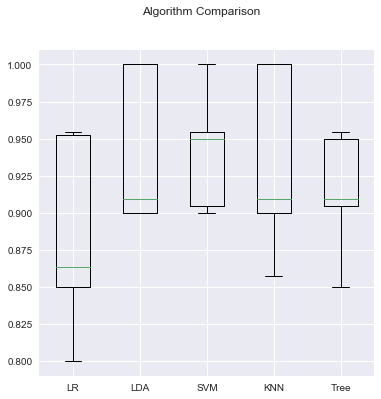

In [70]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.boxplot(Scores)
fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(Names)
plt.show()